In [1]:
import OpenDartReader

api_key = '7f942045d438f45c28bc2707063b8838be98f7e6'

dart = OpenDartReader(api_key)

In [2]:
daishin = dart.report('대신증권', '최대주주', 2022)
daishin.head()

,rcept_no,corp_cls,corp_code,corp_name,stock_knd,nm,relate,bsis_posesn_stock_co,bsis_posesn_stock_qota_rt,trmend_posesn_stock_co,trmend_posesn_stock_qota_rt,rm
0,20230316001545,Y,00110893,대신증권,보통주,양홍석,본인,"4,985,667",9.82,"5,175,034",10.19,*시장매입\n*자사주성과급
1,20230316001545,Y,00110893,대신증권,우선주,양회금,특수관계인,"2,245",0.01,"2,245",0.01,-
2,20230316001545,Y,00110893,대신증권,보통주,노정남,특수관계인,"40,737",0.08,"40,737",0.08,-
3,20230316001545,Y,00110893,대신증권,우선주,노정남,특수관계인,"1,733",0.00,"1,733",0.00,-
4,20230316001545,Y,00110893,대신증권,보통주,안경환,특수관계인,"3,500",0.01,0,0.00,*시장매도


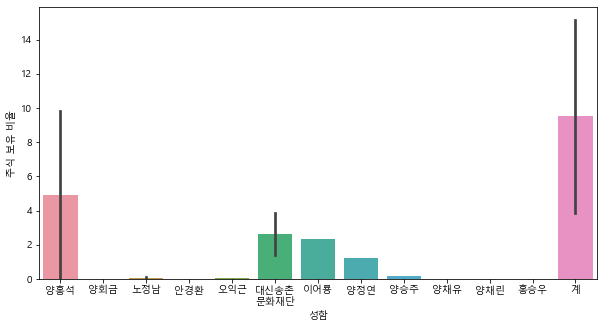

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

daishin['bsis_posesn_stock_qota_rt'] = daishin['bsis_posesn_stock_qota_rt'].astype(float)

plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='nm', y='bsis_posesn_stock_qota_rt', data=daishin)
ax.set_xlabel('성함')
ax.set_ylabel('주식 보유 비율')
plt.show()

Graph with 16 nodes and 13 edges


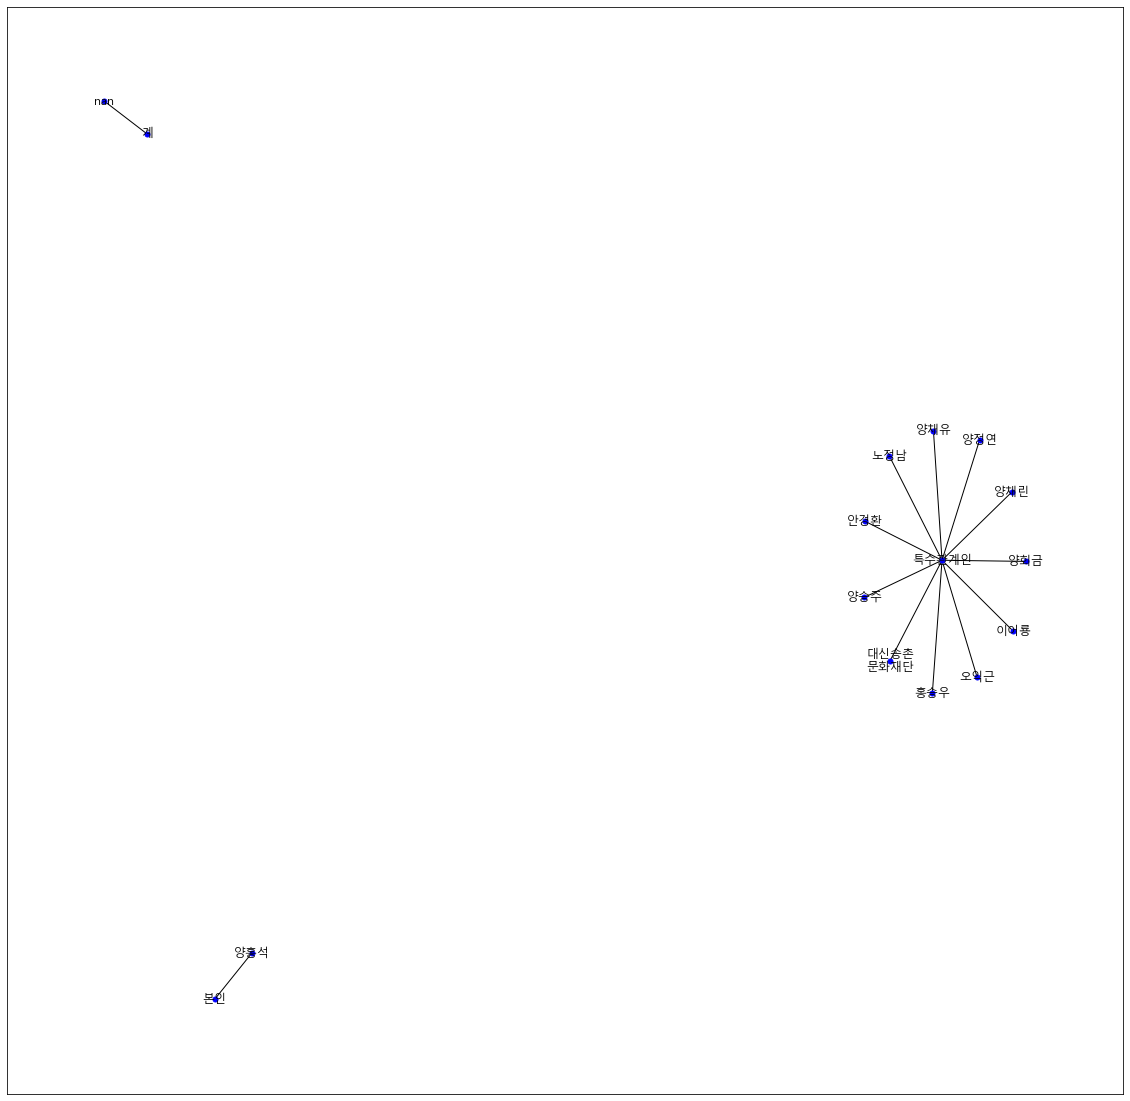

In [7]:
import matplotlib.font_manager as fm
import networkx as nx
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

g = nx.Graph()
g = nx.from_pandas_edgelist(daishin, source = 'nm', target = 'relate')
print(nx.info(g))

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g,pos, node_size = 25, node_color = 'blue', font_family='Malgun Gothic')
plt.show()

In [8]:
daishin_im = dart.report('대신증권', '임원', 2022)
daishin_im.head()

,rcept_no,corp_cls,corp_code,corp_name,nm,sexdstn,birth_ym,ofcps,rgist_exctv_at,fte_at,chrg_job,main_career,mxmm_shrholdr_relate,hffc_pd,tenure_end_on
0,20230316001545,Y,00110893,대신증권,이어룡,여,1953년 09월,회장,사내이사,상근,-,상명여자사범대,1항 1호 나,2004.09.24~2022.12.31,2023년 03월 31일
1,20230316001545,Y,00110893,대신증권,송혁,남,1964년 04월,부사장,미등기,상근,리테일총괄,전북대 회계학\n 대신증권 비서실장\n 대신증권 비서/브랜드본부장\n 대신증권 WM...,-,2010.04.01~2022.12.31,2024년 03월 31일
2,20230316001545,Y,00110893,대신증권,길기모,남,1968년 12월,전무,미등기,상근,리스크관리부문장,서울대 경제학\n 메리츠종금증권 심사팀장\n 메리츠종금증권 리스크관리본부장,-,2019.04.01~2022.12.31,2023년 03월 31일
3,20230316001545,Y,00110893,대신증권,박성준,남,1973년 02월,전무,미등기,상근,IB부문장,홍익대 경영학\n 대신증권 금융주치의전략부장\n 대신증권 IB솔루션부장\n 대신증권...,-,2018.01.01~2022.12.31,2024년 03월 31일
4,20230316001545,Y,00110893,대신증권,이정화,남,1968년 11월,전무,미등기,상근,-,부경대 무역학\n 대신증권 마산지점장\n 대신증권 부전동지점장\n 대신증권 동래지점장,-,2016.01.01~2022.12.31,2023년 03월 31일


In [10]:
name_split = daishin_im["main_career"].str.split("\n")
daishin_im["main_career"] = name_split.str.get(0)


In [11]:
daishin_im.head()

,rcept_no,corp_cls,corp_code,corp_name,nm,sexdstn,birth_ym,ofcps,rgist_exctv_at,fte_at,chrg_job,main_career,mxmm_shrholdr_relate,hffc_pd,tenure_end_on
0,20230316001545,Y,00110893,대신증권,이어룡,여,1953년 09월,회장,사내이사,상근,-,상명여자사범대,1항 1호 나,2004.09.24~2022.12.31,2023년 03월 31일
1,20230316001545,Y,00110893,대신증권,송혁,남,1964년 04월,부사장,미등기,상근,리테일총괄,전북대 회계학,-,2010.04.01~2022.12.31,2024년 03월 31일
2,20230316001545,Y,00110893,대신증권,길기모,남,1968년 12월,전무,미등기,상근,리스크관리부문장,서울대 경제학,-,2019.04.01~2022.12.31,2023년 03월 31일
3,20230316001545,Y,00110893,대신증권,박성준,남,1973년 02월,전무,미등기,상근,IB부문장,홍익대 경영학,-,2018.01.01~2022.12.31,2024년 03월 31일
4,20230316001545,Y,00110893,대신증권,이정화,남,1968년 11월,전무,미등기,상근,-,부경대 무역학,-,2016.01.01~2022.12.31,2023년 03월 31일


In [12]:
name_split = daishin_im["main_career"].str.split(" ")
daishin_im["main_career"] = name_split.str.get(0)

In [13]:
daishin_im.head()

,rcept_no,corp_cls,corp_code,corp_name,nm,sexdstn,birth_ym,ofcps,rgist_exctv_at,fte_at,chrg_job,main_career,mxmm_shrholdr_relate,hffc_pd,tenure_end_on
0,20230316001545,Y,00110893,대신증권,이어룡,여,1953년 09월,회장,사내이사,상근,-,상명여자사범대,1항 1호 나,2004.09.24~2022.12.31,2023년 03월 31일
1,20230316001545,Y,00110893,대신증권,송혁,남,1964년 04월,부사장,미등기,상근,리테일총괄,전북대,-,2010.04.01~2022.12.31,2024년 03월 31일
2,20230316001545,Y,00110893,대신증권,길기모,남,1968년 12월,전무,미등기,상근,리스크관리부문장,서울대,-,2019.04.01~2022.12.31,2023년 03월 31일
3,20230316001545,Y,00110893,대신증권,박성준,남,1973년 02월,전무,미등기,상근,IB부문장,홍익대,-,2018.01.01~2022.12.31,2024년 03월 31일
4,20230316001545,Y,00110893,대신증권,이정화,남,1968년 11월,전무,미등기,상근,-,부경대,-,2016.01.01~2022.12.31,2023년 03월 31일


Graph with 68 nodes and 42 edges


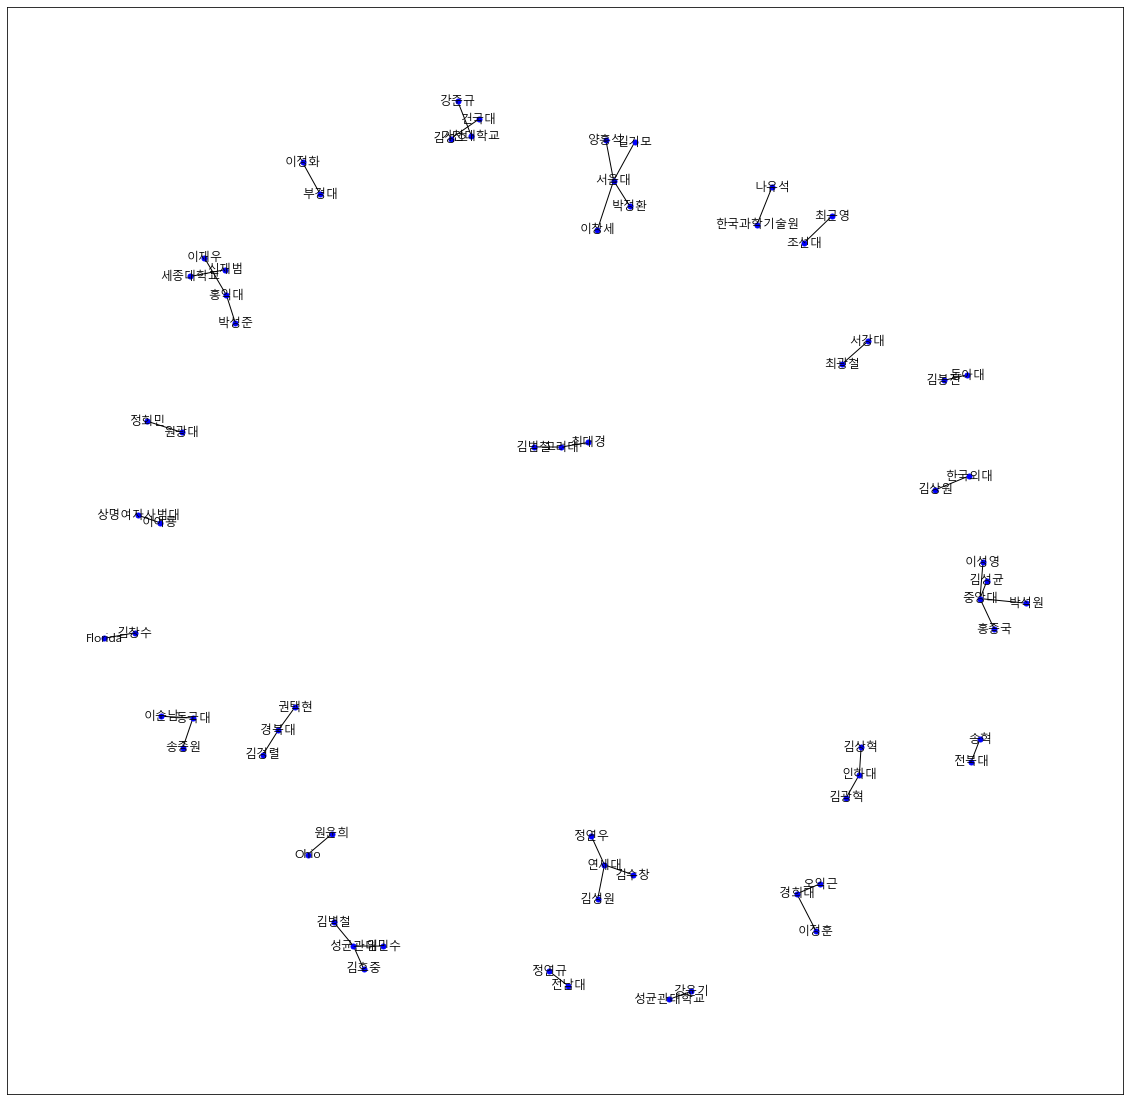

In [14]:
import matplotlib.font_manager as fm
import networkx as nx
# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'

g = nx.Graph()
g = nx.from_pandas_edgelist(daishin_im, source = 'nm', target = 'main_career')
print(nx.info(g))

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(g, k = 0.15)
nx.draw_networkx(g,pos, node_size = 25, node_color = 'blue', font_family='Malgun Gothic')
plt.show()